In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('./data/Netflix.xslx', skiprows=5,
                   parse_dates=['Release Date']).drop(
                      labels=['Unnamed: 0'], axis=1)
df_any_missing = df.isna().any()
print(f'Columns has missing row?\n{df_any_missing.to_string()}')

Columns has missing row?
Title                  False
Available Globally?    False
Release Date            True
Hours Viewed           False


In [3]:
df = df.query('`Release Date`.notna()')
df['Release Year'] = df['Release Date'].dt.year
df['Release Month'] = df['Release Date'].map('{:%b}'.format)
df.columns

Index(['Title', 'Available Globally?', 'Release Date', 'Hours Viewed',
       'Release Year', 'Release Month'],
      dtype='object')

In [4]:
print(df['Release Year'].value_counts().to_frame('Releases per year')
        .sort_index())

      Releases per year
2010                  8
2011                  3
2012                  1
2013                 12
2014                 28
2015                 79
2016                192
2017                361
2018                595
2019                698
2020                779
2021                814
2022                956
2023                329


In [5]:
print(df['Release Month'].value_counts()
        .to_frame('Releases by month').sort_index())

     Releases by month
Apr                401
Aug                385
Dec                465
Feb                350
Jan                363
Jul                363
Jun                413
Mar                419
May                382
Nov                429
Oct                469
Sep                416


In [6]:
print('Unit of Mean Time Viewed is 10,000 hours')
df_mean_watched = df.groupby('Release Year')['Hours Viewed'].mean()
df_mean_watched = ((df_mean_watched.to_frame('Mean Time Viewed') / 10000)
                   .head(20))

print(df_mean_watched.to_string(formatters={\
    'Mean Time Viewed': '{:.2f}'.format}))

Unit of Mean Time Viewed is 10,000 hours
             Mean Time Viewed
Release Year                 
2010                   863.75
2011                  3566.67
2012                   350.00
2013                  1162.50
2014                   898.57
2015                   778.99
2016                   656.04
2017                   638.37
2018                   463.41
2019                   529.63
2020                   643.59
2021                   804.83
2022                  1392.58
2023                  5213.77


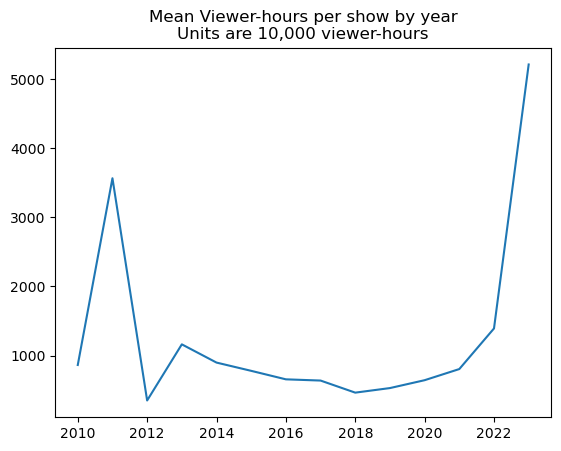

In [7]:
df_mean_watched = df_mean_watched.sort_index()
fig, ax = plt.subplots()
ax.plot(df_mean_watched.index.to_numpy(),
       df_mean_watched['Mean Time Viewed'].to_numpy())
ax.set_title('Mean Viewer-hours per show by year\n'
             'Units are 10,000 viewer-hours')
plt.savefig('plots.png')
plt.show()

In [8]:
print('First shows streamed by Netflix')
df[['Release Date', 'Title']].sort_values('Release Date').head()

First shows streamed by Netflix


,Release Date,Title
1209,2010-04-01,Arrested Development: Season 1
2758,2010-04-01,Arrested Development: Season 3
1844,2010-04-01,Arrested Development: Season 2
3391,2010-09-22,Trailer Park Boys: Season 1
3205,2010-09-22,Trailer Park Boys: Season 2


In [9]:
print('Total Time Viewed is across all seasons\n'
      'and is given in units of 10,000 hours')
df['Title sans season'] = df.Title.str.replace(
    ': Season .*', '', regex=True)
df_gb_title_ss = df.groupby('Title sans season')['Hours Viewed']
df_total_all_seasons = (
    (df_gb_title_ss.sum() / 10000).sort_values(ascending=False)
    .to_frame('Total Time Viewed')
)
print(df_total_all_seasons.head(6).to_string(
    formatters={'Total Time Viewed': '{:.2f}'.format}))

Total Time Viewed is across all seasons
and is given in units of 10,000 hours
                  Total Time Viewed
Title sans season                  
Ginny & Georgia            96720.00
The Night Agent            81210.00
You                        76630.00
Outer Banks                74040.00
The Glory                  62280.00
La Reina del Sur           61680.00
